# MTrack2 Loader Program

_Rev11 250919 DAL, Physics SFU_

This Python program assist in taking the output text file generated by the MTrack2 procedure in ImageJ, and loading into usable arrays, while eliminating the NaN's, extra flags and extra frame data.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

To load your data, input your MTrack2 filename in __np.genfromtxt(trackresults.txt, ... )__

This section of code also eliminates irrelavent columns and rows

In [67]:
PATH = "../Data/2026-02-03/Phys332MM/Lab2-MM/1um-Results.csv"
Test_Path = 'trackresults.txt'
Data2 = "../Data/2026-02-03/Phys332MM/Lab2-MM/1um-post-lab-trackresults.txt"
Data3 = "../Data/2026-02-03/Phys332MM/Lab2-MM/min5px_minTrack-11-trackresults.txt"



In [68]:
my_data = np.genfromtxt(Data3, delimiter='\t', skip_header=2, skip_footer=1)
# skip_footer value can be increased if you have erroneous text at the end of your data file.

# Remove indexer, summary box and Flags column
A=np.zeros(my_data.shape[1]//3+1)
for i in range (my_data.shape[1]//3+1):
    A[i]=3*i
new_data = np.delete(my_data,A,axis=1)

# Sorting the data for easier analysis.  Meaning that __NaN__ are sorted to the end of the list.
mask = np.isnan(new_data)

new_mask=np.zeros(mask.shape)
for ind, value in enumerate(mask):
    new_mask[ind, :] = ~ value * (ind + 1)

new_mask=new_mask.astype(np.int)    
    
for row_index, row in enumerate(new_mask):
    for col_index, item in enumerate(row):
        if item == 0:
            new_mask[row_index][col_index] = (new_mask.shape[0]+5)

for i in range (new_mask.shape[1]):
    new_mask[:,i]=np.sort(new_mask[:,i])

data = np.empty((mask.shape[0],mask.shape[1]))
data[:,:] = np.nan

for i in range(new_mask.shape[0]):
    for j in range(new_mask.shape[1]):
        temp = new_mask[i,j]
        if temp < (new_mask.shape[0]):
            data[i,j] = new_data[temp,j]

IndexError: arrays used as indices must be of integer (or boolean) type

---
ALT CODE

In [69]:
# ALT CODE:

# 1. invalid_raise=False skips the footer lines (summary table) causing the ValueError.
# delimiter='\t' is correct for the test file.
my_data = np.genfromtxt(Data3, delimiter='\t', skip_header=2, skip_footer=1, invalid_raise=False)

# 2. Fix variable type: Ensure 'count' is an integer
count = int(my_data.shape[1] // 3 + 1)

# 3. Fix TypeError: Explicitly use dtype=int for the index array A
A = np.zeros(count, dtype=int)
for i in range(count):
    A[i] = 3 * i

# Now this delete will work
new_data = np.delete(my_data, A, axis=1)

# Sorting the data
mask = np.isnan(new_data)

new_mask = np.zeros(mask.shape)
for ind, value in enumerate(mask):
    new_mask[ind, :] = ~value * (ind + 1)

new_mask = new_mask.astype(int)

for row_index, row in enumerate(new_mask):
    for col_index, item in enumerate(row):
        if item == 0:
            new_mask[row_index][col_index] = (new_mask.shape[0] + 5)

for i in range(new_mask.shape[1]):
    new_mask[:, i] = np.sort(new_mask[:, i])

data = np.empty((mask.shape[0], mask.shape[1]))
data[:, :] = np.nan

for i in range(new_mask.shape[0]):
    for j in range(new_mask.shape[1]):
        temp = new_mask[i, j]
        if temp < (new_mask.shape[0]):
            data[i, j] = new_data[temp, j]

Viewing the loaded data in 1D and 2D formats

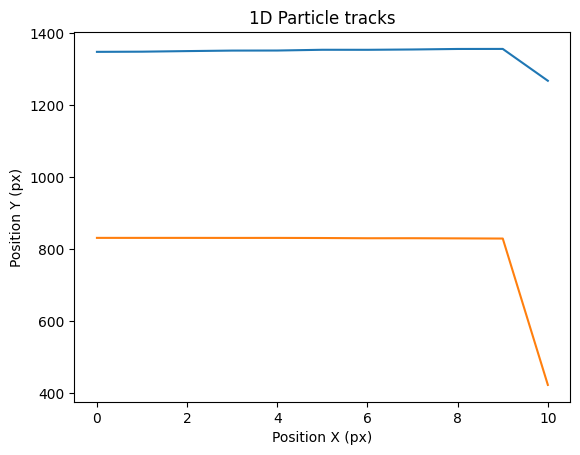

In [ ]:
plt.plot(data)
plt.title('1D Particle tracks')
plt.xlabel('Position X (px)')
plt.ylabel('Position Y (px)')
plt.show()

#Note how not every particle exist for the entire time

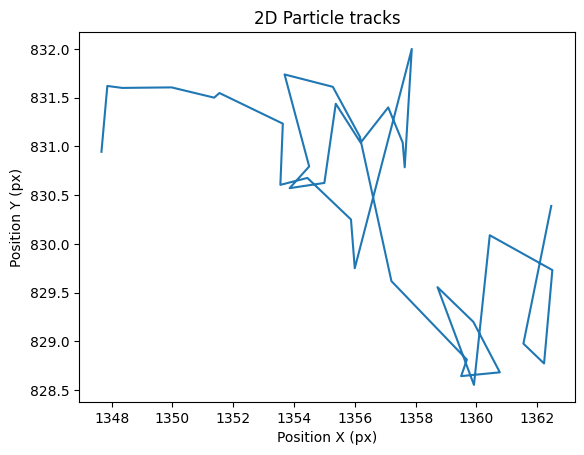

In [70]:
for i in range (data.shape[1]//2):
    plt.plot(data[:,2*i],data[:,2*i+1], label=str(i))

plt.title('2D Particle tracks')
plt.xlabel('Position X (px)')
plt.ylabel('Position Y (px)')
#plt.legend()
plt.show()

Further mathematical operations can be achieved with explicit function calls to the matrix __data__ using indices __data[frame number,column]__. Note particle data is stored in two columns for x and y data; for any particle N, its x-data is in column(2N), and its y-data is in column(2N+1)

In [ ]:
print('X position of Particle 2 = ' + str(data[3,4]))
print('Y position of Particle 2 = ' + str(data[3,5]))

X position of Particle 2 = 619.3924
Y position of Particle 2 = 438.17017


We can also save each tracked object individually with a time array, given an image capture rate (Frame rate).

In [ ]:
Framerate = 200
imagetime = 1/Framerate
time = np.arange(0,data.shape[0]/Framerate,imagetime)
for i in range (data.shape[1]//2):
    temp1 = data[:,2*i]
    temp2 = data[:,2*i+1]
    length = np.isnan(temp1).argmax(axis=0)
    #np.savetxt('Track' + str(i) + '.txt', [time[0:length],temp1[0:length],temp2[0:length]], delimiter='\t')
    ## Row format
#     np.savetxt('Track' + str(i) + '.txt', np.c_[time[0:length],temp1[0:length],temp2[0:length]], delimiter='\t')
    ## Column format